In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as ny # linear algebra
import pandas as ps # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/concentric-circles/Concentric Circle.csv


In [2]:
dataset = ps.read_csv('/kaggle/input/concentric-circles/Concentric Circle.csv')
dataset.head(10)

,X,Y,Output
0,-0.596498,-0.776725,0
1,-0.089718,-0.413583,0
2,-1.000753,-0.326172,0
3,-0.953785,0.247659,0
4,-0.294782,-0.105980,1
5,1.008948,0.418958,0
6,0.491363,0.305323,1
7,1.130229,0.247545,0
8,-0.134016,-0.339336,1
9,-0.084801,-1.005291,1


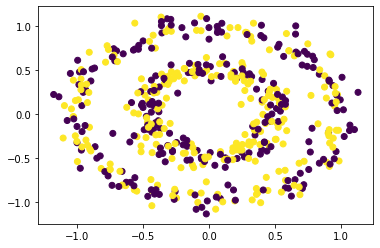

In [3]:
plt.scatter(dataset['X'], dataset['Y'], c = dataset['Output'])

In [4]:
x = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, -1].values

In [5]:
import tensorflow as tw
from tensorflow import keras
from keras import Sequential
from keras.layers import  Dense
from tensorflow.keras.layers import BatchNormalization

In [6]:
model = Sequential()
model.add(Dense(3, activation = 'relu', input_dim = 2))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


2022-12-28 00:31:00.498525: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
traininglog1 = model.fit(x, y, epochs = 200, validation_split = 0.2)

2022-12-28 00:31:00.795423: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
13/13 [==============================] - 1s 22ms/step - loss: 0.7231 - accuracy: 0.5150 - val_loss: 0.7742 - val_accuracy: 0.4100
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7197 - accuracy: 0.5125 - val_loss: 0.7682 - val_accuracy: 0.4100
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7169 - accuracy: 0.5125 - val_loss: 0.7621 - val_accuracy: 0.4100
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7140 - accuracy: 0.5125 - val_loss: 0.7575 - val_accuracy: 0.4100
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7119 - accuracy: 0.5075 - val_loss: 0.7527 - val_accuracy: 0.4100
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7098 - accuracy: 0.5050 - val_loss: 0.7490 - val_accuracy: 0.4000
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7082 - accuracy: 0.5000 - val_loss: 0.7451 - val_accuracy: 0.4000
Epoch 8/200


In [8]:
model = Sequential()
model.add(Dense(3, activation = 'relu', input_dim = 2))
model.add(BatchNormalization())
model.add(Dense(2, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 3)                 9         
_________________________________________________________________
batch_normalization (BatchNo (None, 3)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 8         
_________________________________________________________________
batch_normalization_1 (Batch (None, 2)                 8         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 40
Trainable params: 30
Non-trainable params: 10
_________________________________________________________________


In [9]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
traininglog2 = model.fit(x, y, epochs = 200, validation_split = 0.2)

Epoch 1/200
13/13 [==============================] - 1s 23ms/step - loss: 0.7359 - accuracy: 0.4800 - val_loss: 0.6948 - val_accuracy: 0.5400
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7176 - accuracy: 0.4950 - val_loss: 0.6920 - val_accuracy: 0.5400
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7066 - accuracy: 0.4900 - val_loss: 0.6894 - val_accuracy: 0.5400
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6966 - accuracy: 0.5075 - val_loss: 0.6875 - val_accuracy: 0.5400
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7000 - accuracy: 0.4800 - val_loss: 0.6858 - val_accuracy: 0.5400
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6966 - accuracy: 0.5025 - val_loss: 0.6844 - val_accuracy: 0.5400
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6961 - accuracy: 0.5150 - val_loss: 0.6834 - val_accuracy: 0.5400
Epoch 8/200


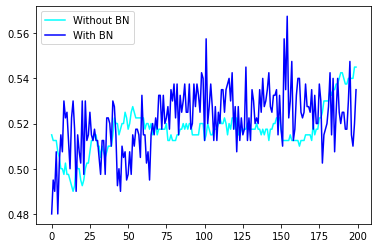

In [10]:
plt.plot(traininglog1.history['accuracy'], color = 'cyan', label = 'Without BN')
plt.plot(traininglog2.history['accuracy'], color = 'blue', label = 'With BN')
plt.legend()
plt.show()